In [1]:
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle

nb_samples = 1000

X = np.zeros(shape=(nb_samples, 2), dtype=np.float32)
Y = np.zeros(shape=(nb_samples,), dtype=np.float32)

t = 15.0 * np.random.uniform(0.0, 1.0, size=(int(nb_samples / 2), 1))

X[0:int(nb_samples / 2), :] = t * np.hstack([-np.cos(t), np.sin(t)]) + \
                              np.random.uniform(0.0, 1.8, size=(int(nb_samples / 2), 2))
Y[0:int(nb_samples / 2)] = 0

X[int(nb_samples / 2):, :] = t * np.hstack([np.cos(t), -np.sin(t)]) + \
                             np.random.uniform(0.0, 1.8, size=(int(nb_samples / 2), 2))
Y[int(nb_samples / 2):] = 1

ss = StandardScaler()
X = ss.fit_transform(X)

X, Y = shuffle(X, Y, random_state=1000)

def plot_surface_model(model):    

    Xm = np.linspace(min(X[:, 0]), max(X[:, 0]), 1000)
    Ym = np.linspace(min(X[:, 1]), max(X[:, 1]), 1000)
    Xmg, Ymg = np.meshgrid(Xm, Ym)
    X_eval = np.vstack([Xmg.ravel(), Ymg.ravel()]).T
    X_eval = np.float32(X_eval)
    Y_eval_mlp = np.argmax(model.predict(X_eval), axis=1)

    plt.scatter(X_eval[:, 0], X_eval[:, 1], c=Y_eval_mlp)
    plt.show()

In [9]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

X_train, X_test, Y_train, Y_test = \
    train_test_split(X, to_categorical(Y), test_size=0.2, random_state=1000, shuffle=False)

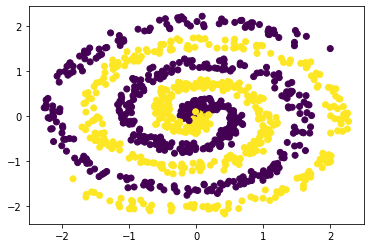

In [10]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.show()

In [36]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

def build_model_alg_example():
    
    model = Sequential()

    model.add(Dense(64, input_dim=2))
    model.add(Activation('relu'))

    model.add(Dense(32))
    model.add(Activation('relu'))

    model.add(Dense(16))
    model.add(Activation('relu'))

    model.add(Dense(2))
    model.add(Activation('softmax'))

    return model

In [37]:
from keras.optimizers import SGD

sgd_model = build_model_alg_example()

sgd = SGD(learning_rate=0.01, momentum=0.99, nesterov=True)

sgd_model.compile(optimizer=sgd,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [38]:
history = sgd_model.fit(X_train, Y_train, 
          epochs=100, 
          batch_size=32,
          validation_data=(X_test, Y_test))

Epoch 1/100
25/25 [==============================] - 1s 16ms/step - loss: 0.6927 - accuracy: 0.4875 - val_loss: 0.7004 - val_accuracy: 0.4950
Epoch 2/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6830 - accuracy: 0.5325 - val_loss: 0.6996 - val_accuracy: 0.5150
Epoch 3/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6774 - accuracy: 0.5462 - val_loss: 0.6899 - val_accuracy: 0.5050
Epoch 4/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6699 - accuracy: 0.5525 - val_loss: 0.6849 - val_accuracy: 0.5350
Epoch 5/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6711 - accuracy: 0.5838 - val_loss: 0.6810 - val_accuracy: 0.5200
Epoch 6/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6681 - accuracy: 0.5688 - val_loss: 0.6834 - val_accuracy: 0.5400
Epoch 7/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6617 - accuracy: 0.5913 - val_loss: 0.6846 - val_accuracy: 0.4850
Epoch 8/100


Epoch 59/100
25/25 [==============================] - 0s 3ms/step - loss: 0.0897 - accuracy: 0.9650 - val_loss: 0.0881 - val_accuracy: 0.9650
Epoch 60/100
25/25 [==============================] - 0s 3ms/step - loss: 0.0913 - accuracy: 0.9638 - val_loss: 0.1084 - val_accuracy: 0.9550
Epoch 61/100
25/25 [==============================] - 0s 4ms/step - loss: 0.0827 - accuracy: 0.9675 - val_loss: 0.0811 - val_accuracy: 0.9650
Epoch 62/100
25/25 [==============================] - 0s 4ms/step - loss: 0.0926 - accuracy: 0.9638 - val_loss: 0.0909 - val_accuracy: 0.9650
Epoch 63/100
25/25 [==============================] - 0s 4ms/step - loss: 0.0893 - accuracy: 0.9650 - val_loss: 0.0847 - val_accuracy: 0.9650
Epoch 64/100
25/25 [==============================] - 0s 4ms/step - loss: 0.0781 - accuracy: 0.9675 - val_loss: 0.0769 - val_accuracy: 0.9550
Epoch 65/100
25/25 [==============================] - 0s 4ms/step - loss: 0.0808 - accuracy: 0.9663 - val_loss: 0.0793 - val_accuracy: 0.9550
Epoch 

32/32 [==============================] - 0s 2ms/step


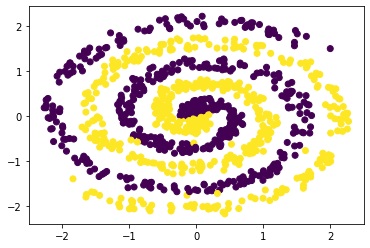

In [39]:
Y_eval_mlp = np.argmax(sgd_model.predict(X), axis=1)

import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=Y_eval_mlp)
plt.show()

31250/31250 [==============================] - 42s 1ms/step


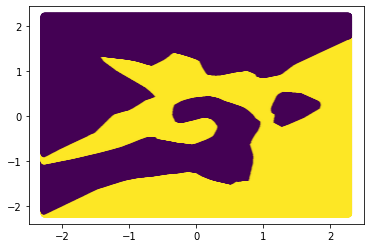

In [41]:
plot_surface_model(model)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


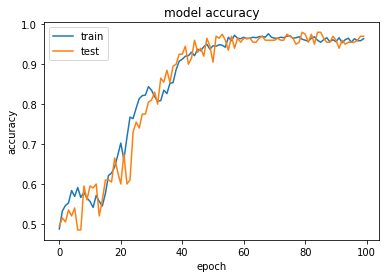

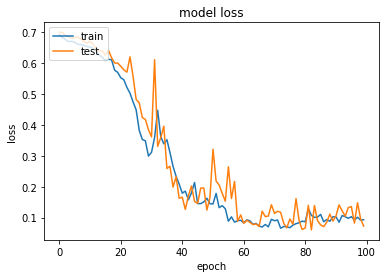

In [40]:
# list all data in history
#print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## ADV Deep Learning

### Filtro Laplaciando

In [2]:
from scipy.misc import face

img = face(gray=True)

In [17]:
img

array([[114, 130, 145, ..., 119, 129, 137],
       [ 83, 104, 123, ..., 118, 134, 146],
       [ 68,  88, 109, ..., 119, 134, 145],
       ...,
       [ 98, 103, 116, ..., 144, 143, 143],
       [ 94, 104, 120, ..., 143, 142, 142],
       [ 94, 106, 119, ..., 142, 141, 140]], dtype=uint8)

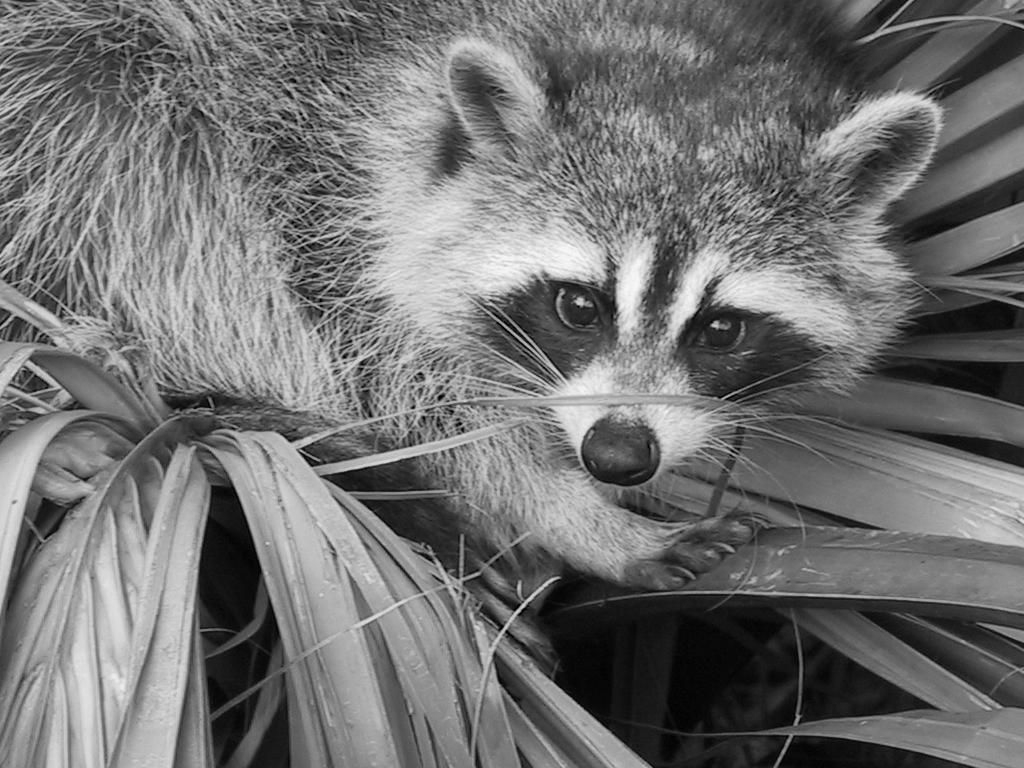

In [18]:
from PIL import Image

Image.fromarray(img)

In [4]:
import numpy as np

kernel = np.array(
    [[0, 1, 0],
     [1, -4, 0],
     [0, 1, 0]], 
     dtype=np.float32)

cfilter = np.zeros((3, 3, 1, 1), dtype=np.float32)
cfilter[:, :, 0, 0] = kernel

In [13]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

graph = tf.Graph()

with graph.as_default():
    x = tf.placeholder(tf.float32, shape=(None, 768, 1024, 1), name='image')
    f = tf.constant(cfilter)
    
    y = tf.nn.conv2d(x, f, strides=[1, 1, 1, 1], padding='SAME')

session = tf.InteractiveSession(graph=graph)

c_img = session.run([y], feed_dict={x: img.reshape((1, 768, 1024, 1))})
n_img = np.array(c_img).reshape((768, 1024))

D:\Backup\Dropbox\Jupyter\venv\lib\site-packages\tensorflow\python\client\session.py:1769: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


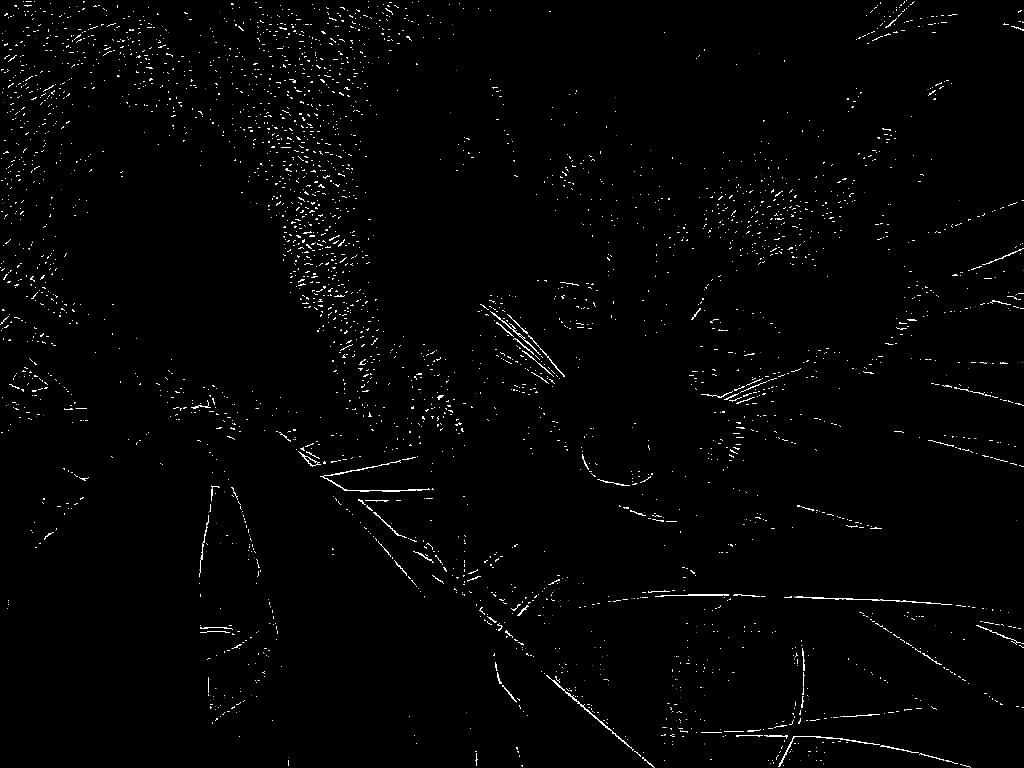

In [14]:
im = Image.fromarray(n_img* 100) 
if im.mode != 'RGB':
    im = im.convert('RGB')
im

### Deep Convolutional Network (DCN)

In [19]:
from keras.datasets import mnist

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

width = height = X_train.shape[1]

X_train = X_train.reshape((X_train.shape[0], width, height, 1)).astype(np.float32) / 255.0
X_test = X_test.reshape((X_test.shape[0], width, height, 1)).astype(np.float32) / 255.0

In [20]:
from keras.utils import to_categorical

Y_train = to_categorical(Y_train, num_classes=10)
Y_test = to_categorical(Y_test, num_classes=10)

In [21]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, AveragePooling2D, Flatten

model = Sequential()

model.add(Dropout(0.25, input_shape=(width, height, 1), seed=1000))

model.add(Conv2D(16, kernel_size=(3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.5, seed=1000))

model.add(Conv2D(16, kernel_size=(3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.5, seed=1000))

model.add(AveragePooling2D(pool_size=(2, 2), padding='same'))
model.add(Conv2D(32, kernel_size=(3, 3), padding='same'))
model.add(Activation('relu'))

model.add(AveragePooling2D(pool_size=(2, 2), padding='same'))

model.add(Conv2D(64, kernel_size=(3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.5, seed=1000)) # BatchNormalization()

model.add(AveragePooling2D(pool_size=(2, 2), padding='same'))

model.add(Flatten())

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5, seed=1000))

model.add(Dense(10))
model.add(Activation('softmax'))

In [22]:
from keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=0.001, decay=1e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [23]:
history = model.fit(X_train, Y_train,
                    epochs=2,
                    batch_size=256,
                    validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - ETA: 0s - loss: 0.5798 - acc: 0.8070

D:\Backup\Dropbox\Jupyter\venv\lib\site-packages\keras\engine\training_v1.py:2332: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


60000/60000 [==============================] - 75s 1ms/sample - loss: 0.5798 - acc: 0.8070 - val_loss: 0.1318 - val_acc: 0.9589
Epoch 2/2
60000/60000 [==============================] - 80s 1ms/sample - loss: 0.1925 - acc: 0.9398 - val_loss: 0.0832 - val_acc: 0.9746


dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


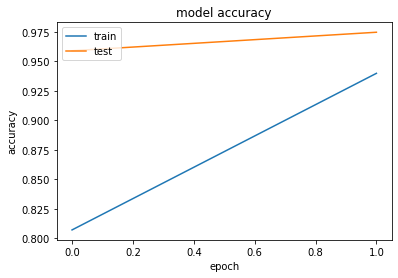

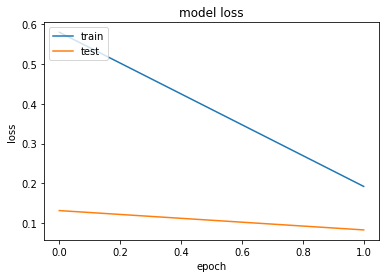

In [28]:
import matplotlib.pyplot as plt
# list all data in history
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [25]:
from sklearn import metrics
y_pred = model.predict(X_test)

D:\Backup\Dropbox\Jupyter\venv\lib\site-packages\keras\engine\training_v1.py:2356: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


In [141]:
matrix = metrics.confusion_matrix(Y_test.argmax(axis=1), y_pred.argmax(axis=1))
matrix

array([[ 937,    1,    1,    8,    6,    6,    7,    1,   13,    0],
       [   0, 1113,    0,    7,    1,    2,    6,    0,    5,    1],
       [  11,    2,  843,   79,   31,   11,   27,    7,   20,    1],
       [   4,   15,   28,  866,    2,   30,    2,   16,   28,   19],
       [   0,    5,    3,    0,  860,    0,   24,    1,    2,   87],
       [   9,    8,    8,  102,   42,  689,    9,    2,    4,   19],
       [  19,   14,    6,    0,   12,   22,  883,    0,    2,    0],
       [   1,   33,   12,   35,   10,    2,    1,  808,   10,  116],
       [  13,   36,    7,   64,   21,   55,   12,   13,  738,   15],
       [   7,   16,    6,   17,   46,    3,    0,   18,   15,  881]],
      dtype=int64)

### Exemplo 2

In [102]:
import numpy as np

from keras.datasets import mnist
from keras.utils import to_categorical

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

width = height = X_train.shape[1]

X_train = X_train.reshape((X_train.shape[0], width, height, 1)).astype(np.float32) / 255.0
X_test = X_test.reshape((X_test.shape[0], width, height, 1)).astype(np.float32) / 255.0

Y_train = to_categorical(Y_train, num_classes=10)
Y_test = to_categorical(Y_test, num_classes=10)

In [104]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, AveragePooling2D, Flatten
from keras.optimizers import Adam

model = Sequential()

model.add(Dropout(0.25, input_shape=(width, height, 1), seed=1000))

model.add(Conv2D(16, kernel_size=(3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.5, seed=1000))

model.add(Conv2D(32, kernel_size=(3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.5, seed=1000))

model.add(AveragePooling2D(pool_size=(2, 2), padding='same'))

model.add(Conv2D(64, kernel_size=(3, 3), padding='same'))
model.add(Activation('relu'))

model.add(AveragePooling2D(pool_size=(2, 2), padding='same'))

model.add(Conv2D(64, kernel_size=(3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.5, seed=1000))

model.add(AveragePooling2D(pool_size=(2, 2), padding='same'))

model.add(Flatten())

model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dropout(0.5, seed=1000))

model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(optimizer=Adam(learning_rate=0.001, decay=1e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [105]:
history = model.fit(X_train, Y_train,
                    epochs=200,
                    batch_size=256,
                    validation_data=(X_test, Y_test))

Epoch 1/200
235/235 [==============================] - 134s 559ms/step - loss: 0.4579 - accuracy: 0.8506 - val_loss: 0.1176 - val_accuracy: 0.9658
Epoch 2/200
  8/235 [>.............................] - ETA: 2:03 - loss: 0.1587 - accuracy: 0.9438

KeyboardInterrupt: 

### Exemplo Dropout

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam

model = Sequential()

model.add(Dense(2048, input_shape=(width * height, )))
model.add(Activation('relu'))

model.add(Dense(1024))
model.add(Activation('relu'))

model.add(Dense(1024))
model.add(Activation('relu'))

model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(optimizer=Adam(lr=0.0001, decay=1e-6),
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, Y_train,
                    epochs=200,
                    batch_size=256,
                    validation_data=(X_test, Y_test))

### Exemplo Dropout 2

In [ ]:
rom keras.constraints import maxnorm
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.optimizers import SGD

model = Sequential()

model.add(Dropout(0.25, input_shape=(width * height, ), seed=1000))

model.add(Dense(2048, kernel_initializer='uniform', kernel_constraint=maxnorm(2.0)))
model.add(Activation('relu'))
model.add(Dropout(0.5, seed=1000))

model.add(Dense(1024, kernel_initializer='uniform', kernel_constraint=maxnorm(2.0)))
model.add(Activation('relu'))
model.add(Dropout(0.5, seed=1000))

model.add(Dense(1024, kernel_initializer='uniform', kernel_constraint=maxnorm(2.0)))
model.add(Activation('relu'))
model.add(Dropout(0.5, seed=1000))

model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(optimizer=SGD(lr=0.1, momentum=0.9),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, Y_train,
                    epochs=200,
                    batch_size=256,
                    validation_data=(X_test, Y_test))

### Exemplo com Batch Normalization

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation, BatchNormalization
from keras.optimizers import Adam

model = Sequential()

model.add(Dense(2048, input_shape=(width * height, )))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Dense(1024))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Dense(1024))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Dense(10))
model.add(BatchNormalization())
model.add(Activation('softmax'))

model.compile(optimizer=Adam(lr=0.001, decay=1e-6),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, Y_train,
                    epochs=200,
                    batch_size=256,
                    validation_data=(X_test, Y_test))


### Exemplo de uma rede convolucional profunda com Keras e aumento de dados

In [ ]:
from keras.datasets import fashion_mnist

(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()

In [ ]:
import numpy as np

from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical

nb_classes = 10
train_batch_size = 256
test_batch_size = 100

train_idg = ImageDataGenerator(rescale=1.0 / 255.0,
                               samplewise_center=True,
                               samplewise_std_normalization=True,
                               horizontal_flip=True,
                               rotation_range=10.0,
                               shear_range=np.pi / 12.0,
                               zoom_range=0.25)

train_dg = train_idg.flow(x=np.expand_dims(X_train, axis=3),
                          y=to_categorical(Y_train, num_classes=nb_classes),
                          batch_size=train_batch_size,
                          shuffle=True,
                          seed=1000)

test_idg = ImageDataGenerator(rescale=1.0 / 255.0,
                              samplewise_center=True,
                              samplewise_std_normalization=True)

test_dg = train_idg.flow(x=np.expand_dims(X_test, axis=3),
                         y=to_categorical(Y_test, num_classes=nb_classes),
                         shuffle=False,
                         batch_size=test_batch_size,
                         seed=1000) 

In [ ]:
from keras.models import Sequential
from keras.layers import Activation, Dense, Flatten, LeakyReLU, Conv2D, MaxPooling2D, BatchNormalization
from keras.optimizers import Adam

model = Sequential()

model.add(Conv2D(filters=32,
                 kernel_size=(3, 3),
                 padding='same',
                 input_shape=(X_train.shape[1], X_train.shape[2], 1)))

model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.1))

model.add(Conv2D(filters=64,
                 kernel_size=(3, 3),
                 padding='same'))

model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.1))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64,
                 kernel_size=(3, 3),
                 padding='same'))

model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.1))

model.add(Conv2D(filters=128,
                 kernel_size=(3, 3),
                 padding='same'))

model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.1))

model.add(Conv2D(filters=128,
                 kernel_size=(3, 3),
                 padding='same'))

model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.1))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(units=1024))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.1))

model.add(Dense(units=1024))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.1))

model.add(Dense(units=nb_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.0001, decay=1e-5),
              metrics=['accuracy'])

In [ ]:
from keras.callbacks import ReduceLROnPlateau

nb_epochs = 100
steps_per_epoch = 1500

history = model.fit(train_dg,
                              epochs=nb_epochs,
                              steps_per_epoch=steps_per_epoch,
                              validation_data=test_dg,
                              validation_steps=int(X_test.shape[0] / test_batch_size),
                              callbacks=[
                                 ReduceLROnPlateau(factor=0.1, patience=1, cooldown=1, min_lr=1e-6)
                              ])
